# **Understanding CNNs with Kannada-MNIST**


# Imports
These are the imports we need to get started with machine leraning
- Pandas - Used for handling csv data
- MatPlotLib - Used for plotting graphs
- Keras - A popular deep learning library we will use to create our CNN
- SKLearn - Popular machine learning library we will use to split our data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Data
We will load the data, split it, artificially generate more data to make it more diverse and then make it ready for training

In [2]:
# Load the data
Dig_MNIST = pd.read_csv("input/Dig-MNIST.csv")
sample_submission = pd.read_csv("input/sample_submission.csv")
test = pd.read_csv("input/test.csv")
train = pd.read_csv("input/train.csv")

# Split the data
x = train.iloc[:,1:].values
y = train.iloc[:,0].values
y[:10]
x_test = test.drop('id', axis=1).iloc[:,:].values
x_dig = Dig_MNIST.drop('label', axis=1).iloc[:,:].values
y_dig = Dig_MNIST.label

# Reshape the data
x = x.reshape(x.shape[0], 28, 28, 1)
y = to_categorical(y, 10)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_dig = x_dig.reshape(x_dig.shape[0], 28, 28, 1)

# Split the data between train and test
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.10, random_state=42) 

# Artificially increase training set
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=10,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   shear_range=0.1,
                                   zoom_range=0.25,
                                   horizontal_flip=False)

valid_datagen = ImageDataGenerator(rescale=1./255.)

# The CNN

## Simple explanation of what a CNN is
![](https://i.imgur.com/Qd9JpWj.png)
Convolutional neural network (CNN) is a type of neural network architecture specially made to deal with visual data. In this article we will discuss the architecture of CNN and implement it on CIFAR-10 dataset in part-2. The main benefit of using a CNN over simple ANN on visual data is that CNN’s are constrained to deal with image data exclusively. Two main features of CNNs are

- Weight sharing
- Feature extractors

![](https://i.imgur.com/RYMoJpL.png)

As we described above, a simple ConvNet is a sequence of layers, and every layer of a ConvNet transforms one volume of activations to another through a differentiable function. We use three main types of layers to build ConvNet architectures: Convolutional Layer, Pooling Layer, and Fully-Connected Layer (exactly as seen in regular Neural Networks). We will stack these layers to form a full ConvNet architecture.

Several new layers are introduced in CNNs to extract the useful features from our image or reducing the size of image without using the original representation.

### Convolution Layer
Convolutional layer apply convolution operation on the input layer, passing the results to next layer. A convolution operation is basically computing a dot product between their weights and a small region they are connected(currently overlapping) to in the input volume. This will change the dimensions depending on the filter size used and number of filters used.

We can compute the spatial size of the output volume as a function of the input volume size (W), the receptive field size of the Conv Layer neurons (F), the stride with which they are applied (S), and the amount of zero padding used (P) on the border. You can convince yourself that the correct formula for calculating how many neurons “fit” is given by (W−F+2P)/S+1. For example for a 7x7 input and a 3x3 filter with stride 1 and pad 0 we would get a 5x5 output. With stride 2 we would get a 3x3 output.

### ReLU Layer
Rectifying Linear Unit (ReLU) layer applies the relu activation element-wise. It is a mathematical function, which returns a positive value or 0 in place of previous negative values, It does not change the dimensions of the previous layer.

### Pooling Layer
Pooling layer will perform a down-sampling operation along the width and resulting in the reduction of the dimensions. The sole purpose of pooling is to reduce spatial dimensions. There are various types of pooling in which the most common is Max Pooling, i.e taking the maximum element from the window.
![](https://i.imgur.com/5Q54piT.png)

### Stride
Stride decides by how much we move our window ,when we have a stride of one we move across and down a single pixel. With higher stride values, we move large number of pixels at a time and hence produce smaller output volumes.

### Padding
Padding is used to preserve the boundary information , since without padding they are only traversed once.
![](https://i.imgur.com/MWorvXh.png)

### Flattening Layer
This layer will convert the 3-dimensions (height,width,depth) into a single long vector to feed it to the fully connected layer or Dense layer. It connects every neuron in one layer to every neuron in another layer.

Fully Connected Layer and Output Layer
Fully connected layers or dense layers are the same hidden layers consisting of defined number of neurons connected with elements of another layer that we discussed in simple ANN. However the output layer is also the same but the number of neurons depend on our task. For instance in CIFAR-10 dataset we have 10 classes hence we will have 10 neurons in the outer layer.

### Summary
![](https://i.imgur.com/x0DIK9L.jpg)

In summary, the architecture of CNN , we can simply understand that it consist of an input layer followed by a Conv layer. The dimensions of conv layer depends on the data and problem, hence changing the dimensions accordingly. After the Conv Layer there is a activation layer , usually ReLU since it gives better results. After some conv and relu combination , pooling layer is used to reduce the size. Then after some combination of previously defined architecture , flattening layer is used to flatten the input for fully connected layer. Next to these layer, the last layer is the output layer.

In [3]:
batch_size = 1024
num_classes = 10
epochs = 50
learning_rate = 0.001
model_name = 'k-mnist_trained_model.h5'

model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.summary()

optimizer = RMSprop(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        102464    
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)       

## Fitting the model

In [4]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=200,
                                            verbose=1,
                                            factor=0.2)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

history = model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=batch_size),
                              steps_per_epoch=100,
                              epochs=epochs,
                              validation_data=valid_datagen.flow(x_valid, y_valid),
                              validation_steps=50,
                              callbacks=[learning_rate_reduction, es])

Epoch 1/50
100/100 [==============================] - 35s 354ms/step - loss: 0.5354 - accuracy: 0.8218 - val_loss: 20.4028 - val_accuracy: 0.0900
Epoch 2/50
100/100 [==============================] - 29s 285ms/step - loss: 0.1346 - accuracy: 0.9578 - val_loss: 47.3596 - val_accuracy: 0.1025
Epoch 3/50
100/100 [==============================] - 29s 291ms/step - loss: 0.0813 - accuracy: 0.9741 - val_loss: 38.4624 - val_accuracy: 0.1013
Epoch 4/50
100/100 [==============================] - 29s 293ms/step - loss: 0.0618 - accuracy: 0.9803 - val_loss: 41.7178 - val_accuracy: 0.0871
Epoch 5/50
100/100 [==============================] - 29s 287ms/step - loss: 0.0539 - accuracy: 0.9831 - val_loss: 37.1833 - val_accuracy: 0.0913
Epoch 6/50
100/100 [==============================] - 29s 287ms/step - loss: 0.0465 - accuracy: 0.9855 - val_loss: 7.6518 - val_accuracy: 0.3444
Epoch 7/50
100/100 [==============================] - 29s 288ms/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.2143 - v

# Visualising accuracy and loss

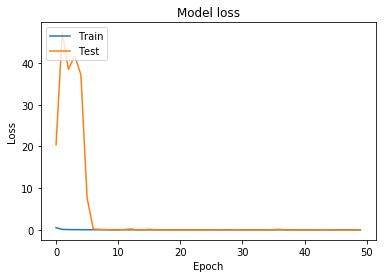

In [5]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Make the submission

In [6]:
predictions = model.predict_classes(x_test/255.)
submission = pd.read_csv("input/sample_submission.csv")
submission['label'] = predictions
submission.to_csv("submission.csv", index=False)